# Gala installation (https://gala.adrian.pw/en/latest/install.html)

1. Make an Anaconda (or miniconda) environment for gala
>>> conda create --name gala python=3.12
>>> conda activate gala

2. Check GSL support
(while gala environment is activated)
>>> gsl-config --version

if GSL is not installed,
(while gala environment is activated)
>>> conda install -c conda-forge gsl

3. Install gala
(while gala environment is activated)
>>> python -m pip install gala

4. Install matplotlib
(while gala environment is activated)
>>> python -m pip install matplotlib


In [6]:
import astropy.units as u
import numpy as np
import gala.potential as gp
import gala.dynamics as gd
from gala.dynamics import mockstream as ms
from gala.units import galactic

import astropy.coordinates as coord
_ = coord.galactocentric_frame_defaults.set('v4.0')

import matplotlib.pyplot as plt

In [ ]:
def make_stream_rev(df, host_pot, sat_pot, sat_w0, sat_mass, dt=-1 * u.Myr, n_steps=4000):

    gen_stream = ms.MockStreamGenerator(df, host_pot, progenitor_potential=sat_pot)
    sat_stream, _ = gen_stream.run(sat_w0, sat_mass,
                                dt=dt, n_steps=n_steps)
    
    return sat_stream

def plotter(host, stream):
    
    grid = np.linspace(-25, 25, 100)
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
    host.plot_contours(grid=(grid, grid, 0.), ax=ax1, cmap='Greys', alpha=0.5)
    host.plot_contours(grid=(grid, 0., grid), ax=ax2, cmap='Greys', alpha=0.5)
    host.plot_contours(grid=(0., grid, grid), ax=ax3, cmap='Greys', alpha=0.5)
    stream.plot(['x', 'y', 'z'], alpha=0.1, axes=[ax1, ax2, ax3])
    
    ax1.set_xlim(-20, 20); ax1.set_ylim(-20, 20); ax1.set_aspect('equal')
    ax2.set_xlim(-20, 20); ax2.set_ylim(-20, 20); ax2.set_aspect('equal')
    ax3.set_xlim(-20, 20); ax3.set_ylim(-20, 20); ax3.set_aspect('equal')

    plt.show()

def plot_mass_enc(pot):
    
    pos = np.zeros((3,100)) * u.kpc
    pos[0] = np.logspace(np.log10(20./100.), np.log10(20*100.), pos.shape[1]) * u.kpc
    m_profile = pot.mass_enclosed(pos)
    
    plt.figure(figsize=(5,4))
    plt.loglog(pos[0], m_profile, marker='') 
    plt.xlabel("$r$ [{}]".format(pos.unit.to_string(format='latex'))) 
    plt.ylabel("$M(<r)$ [{}]".format(m_profile.unit.to_string(format='latex'))) 

    plt.show()

In [27]:
# Stream distribution function
df = ms.FardalStreamDF(gala_modified=True)

# Information for Pal 5
pal5_c = coord.SkyCoord(ra=229.018*u.degree, dec=-0.124*u.degree,
                        distance=22.9*u.kpc,
                        pm_ra_cosdec=-2.296*u.mas/u.yr,
                        pm_dec=-2.257*u.mas/u.yr,
                        radial_velocity=-58.7*u.km/u.s)
rep = pal5_c.transform_to(coord.Galactocentric).data
pal5_w0 = gd.PhaseSpacePosition(rep)

pal5_mass = 2.5e4 * u.Msun

# Setting Pal 5 potential with Plummer potential
pal5_pot = gp.PlummerPotential(m=pal5_mass, b=4*u.pc, units=galactic)


Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


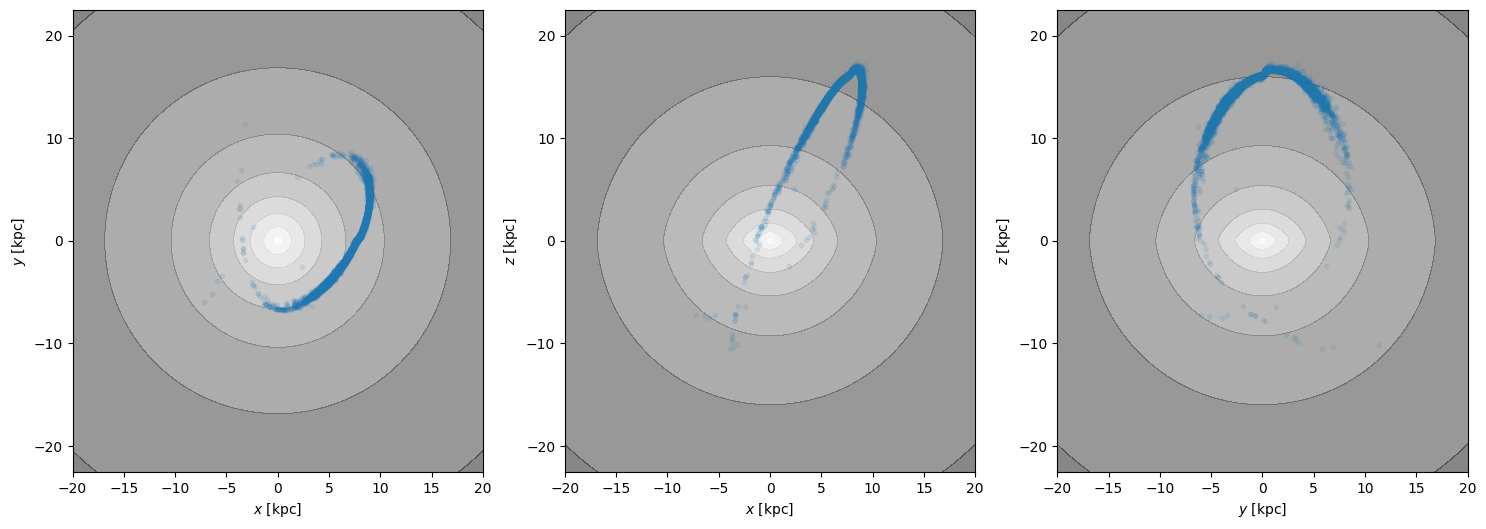

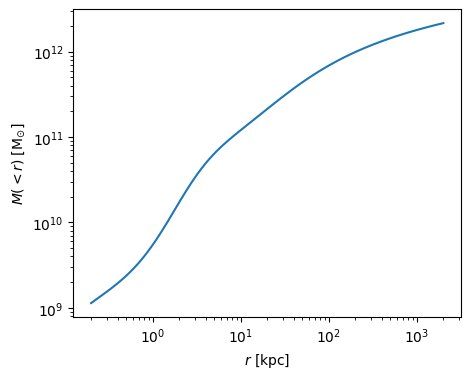

In [ ]:
# (realistic) Model Milky Way potential
mwpot = gp.MilkyWayPotential()

# Pal 5 stream (+ GC) at present day
pal5_stream = make_stream_rev(df=df, host_pot=mwpot, sat_pot=pal5_pot, sat_w0=pal5_w0, sat_mass=pal5_mass)

plotter(mwpot, pal5_stream)

plot_mass_enc(mwpot)

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


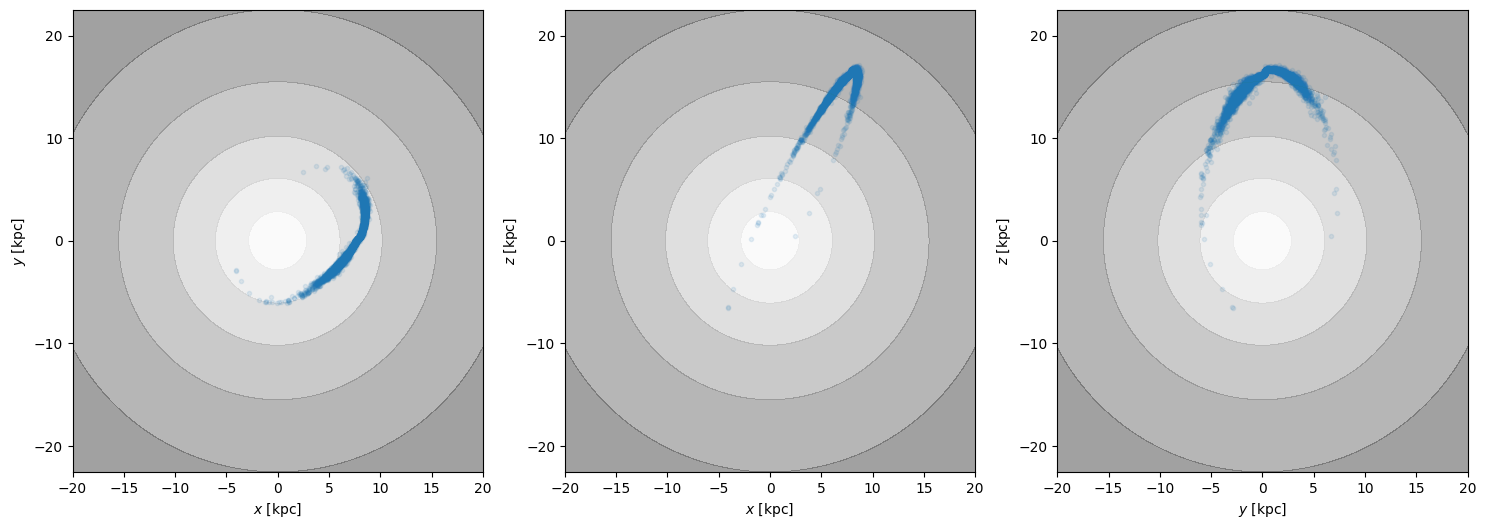

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


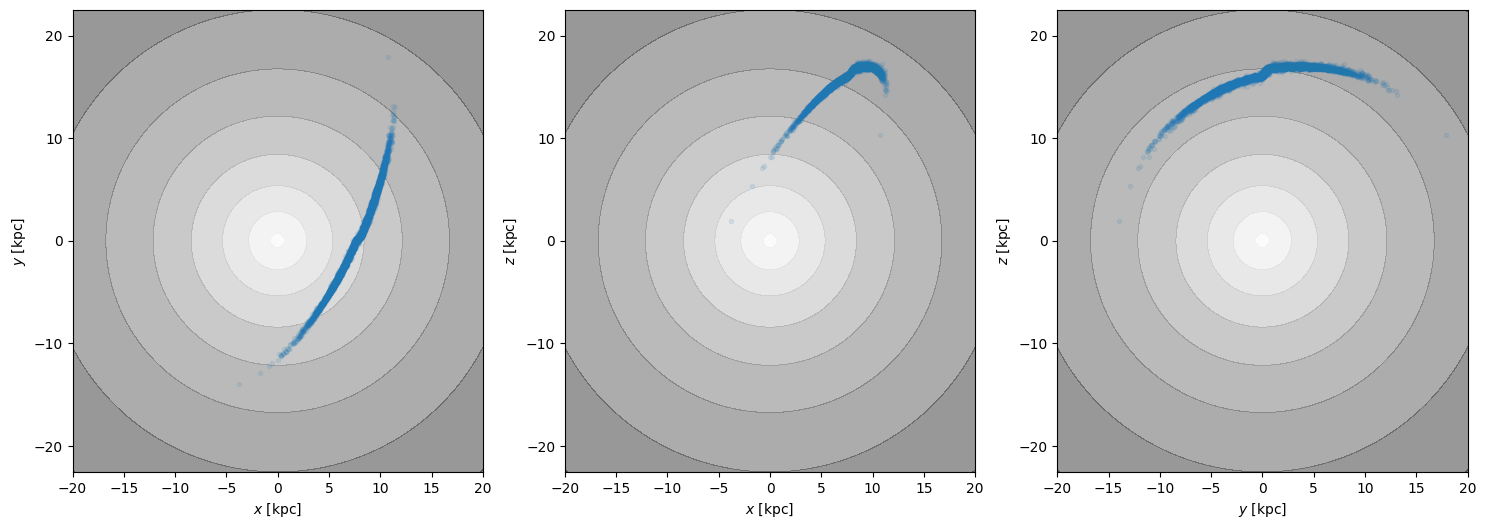

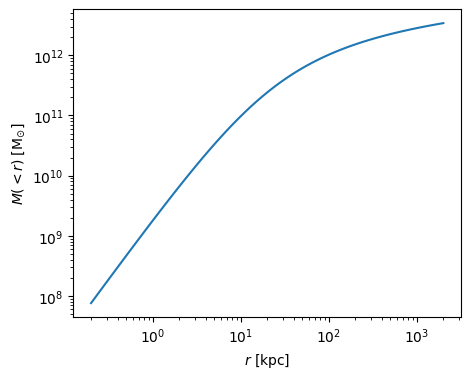

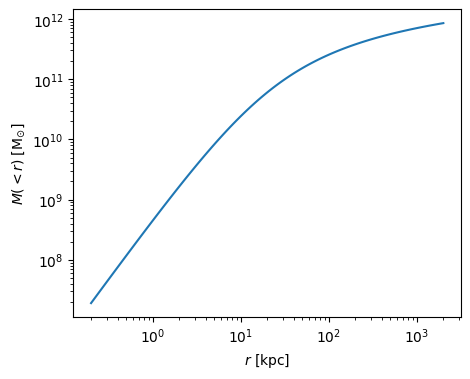

In [ ]:
# A toy potential (only having a NFW representing MW halo, with v_c scaled to 220 km/s)
toy_pot_1 = gp.NFWPotential.from_circular_velocity(v_c=220*u.km/u.s,
                                             r_s=15*u.kpc,
                                             units=galactic)

pal5_stream_toy_1 = make_stream_rev(df=df, host_pot=toy_pot_1, sat_pot=pal5_pot, sat_w0=pal5_w0, sat_mass=pal5_mass)

plotter(toy_pot_1, pal5_stream_toy_1)

# A similar toy potential (only having a NFW representing MW halo, but much lighter as its v_c is scaled to 110 km/s)
toy_pot_1_1 = gp.NFWPotential.from_circular_velocity(v_c=110*u.km/u.s,
                                             r_s=15*u.kpc,
                                             units=galactic)

pal5_stream_toy_1_1 = make_stream_rev(df=df, host_pot=toy_pot_1_1, sat_pot=pal5_pot, sat_w0=pal5_w0, sat_mass=pal5_mass)

plotter(toy_pot_1_1, pal5_stream_toy_1_1)

plot_mass_enc(toy_pot_1)
plot_mass_enc(toy_pot_1_1)

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


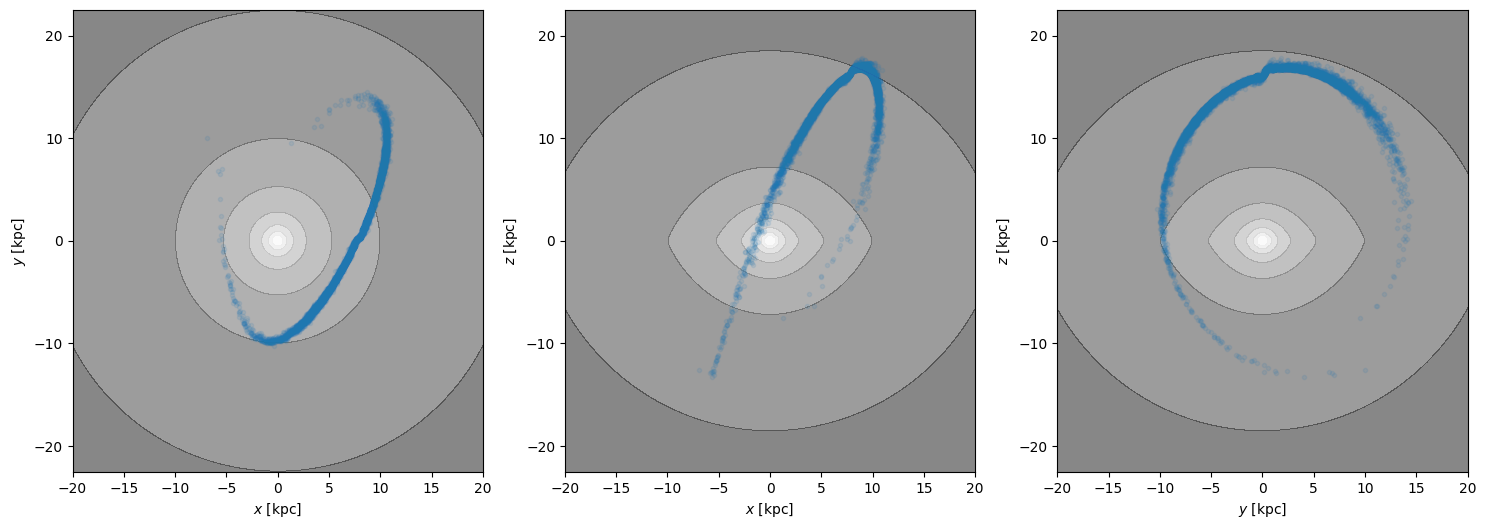

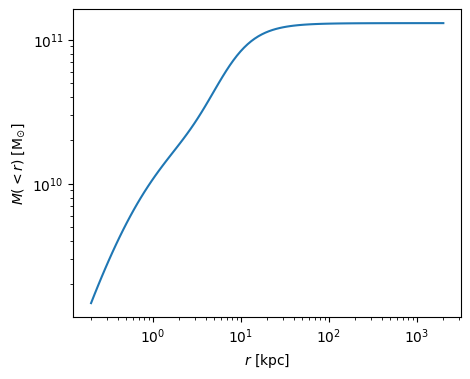

In [ ]:
# Another toy potential, but oddly only has a disk and a bulge (see the enclosed mass distribution!)
toy_disk = gp.MiyamotoNagaiPotential(m=1E11, a=6.5, b=0.27, units=galactic)
toy_bulge = gp.HernquistPotential(m=3E10, c=0.7, units=galactic)
toy_pot_2 = gp.CCompositePotential(disk=toy_disk, bulge=toy_bulge)

pal5_stream_toy_2 = make_stream_rev(df=df, host_pot=toy_pot_2, sat_pot=pal5_pot, sat_w0=pal5_w0, sat_mass=pal5_mass)

plotter(toy_pot_2, pal5_stream_toy_2)

plot_mass_enc(toy_pot_2)